In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

In [10]:
import random
import numpy as np

import tic_tac_toe as ttt
import data_set as ds
import neural_network as nn

seed = 867342
data_set_file_name = "data_set.csv"
model_file_name = "model.h5"

random.seed(seed)
np.random.seed(int(seed))

data_set = ds.read_data_set(data_set_file_name)
training_set = data_set
x, y_true = nn.get_data_for_neural_network(training_set, nn.get_win_ratio)
model = nn.create_fit_model(x, y_true, model_file_name = model_file_name)
y_pred = model.predict([nn.convert_grid_for_neural_network(grid) for grid in x], batch_size = 1)

Epoch 1/100
5478/5478 [==============================] - 1s 190us/step - loss: 0.0482 - mean_squared_error: 0.0482 - mean_absolute_error: 0.1649
Epoch 2/100
5478/5478 [==============================] - 0s 85us/step - loss: 0.0229 - mean_squared_error: 0.0229 - mean_absolute_error: 0.1155
Epoch 3/100
5478/5478 [==============================] - 0s 82us/step - loss: 0.0174 - mean_squared_error: 0.0174 - mean_absolute_error: 0.0995
Epoch 4/100
5478/5478 [==============================] - 0s 80us/step - loss: 0.0147 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0906
Epoch 5/100
5478/5478 [==============================] - 0s 79us/step - loss: 0.0129 - mean_squared_error: 0.0129 - mean_absolute_error: 0.0847
Epoch 6/100
5478/5478 [==============================] - 0s 78us/step - loss: 0.0113 - mean_squared_error: 0.0113 - mean_absolute_error: 0.0791
Epoch 7/100
5478/5478 [==============================] - 0s 84us/step - loss: 0.0101 - mean_squared_error: 0.0101 - mean_absolute_error

5478/5478 [==============================] - 0s 78us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0309
Epoch 58/100
5478/5478 [==============================] - 0s 83us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0309
Epoch 59/100
5478/5478 [==============================] - 0s 80us/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0306
Epoch 60/100
5478/5478 [==============================] - 0s 79us/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0301
Epoch 61/100
5478/5478 [==============================] - 0s 78us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0298
Epoch 62/100
5478/5478 [==============================] - 0s 79us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0294
Epoch 63/100
5478/5478 [==============================] - 0s 78us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.029

In [3]:
"""
import keras
model = keras.models.load_model("model_1000_epochs.h5")
#model = keras.models.load_model("model.h5")
y_pred = model.predict([nn.convert_grid_for_neural_network(grid) for grid in x], batch_size = 1)
"""

'\nimport keras\nmodel = keras.models.load_model("model_1000_epochs.h5")\n#model = keras.models.load_model("model.h5")\ny_pred = model.predict([nn.convert_grid_for_neural_network(grid) for grid in x], batch_size = 1)\n'

In [4]:
error_function_list = [lambda y_t, y_p: list(map(lambda t, p: abs(t - p), y_t, y_p))]
errors = nn.compute_errors(model, x, y_true, y_pred, error_function_list)

opacity = 0.5
color = 'orange'
edge_color = 'black'
mean_color = 'orange'
median_color = 'red'

<IPython.core.display.Javascript object>


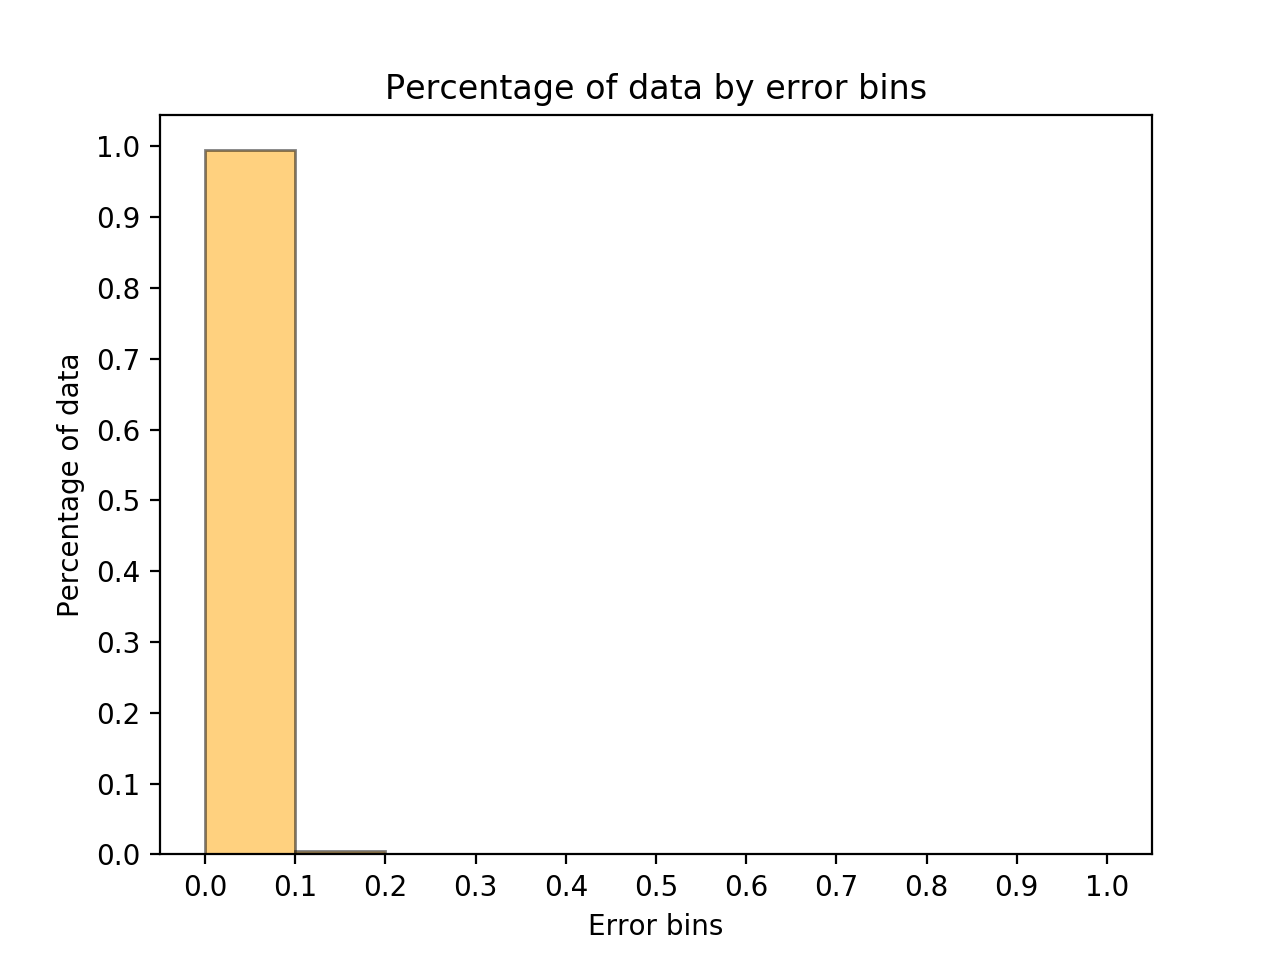

'\nAlternative 1:\ndf = pd.DataFrame({\'Errors\' : errors})\n\nfig = plt.figure()\nplt.hist(df.values, bins=bins, edgecolor="k")\nplt.show()\n\nAlternative 2:\ncenter = (bins[1:] + bins[:-1]) / 2\nfig = plt.figure()\nplt.hist(center, bins=len(data_percentages), weights=data_percentages, range=(min(bins), max(bins)))\nplt.show()\n'

In [5]:
# Error bins.
data_percentages, bins = nn.error_bins_data_percentage(errors[0][0], 10, (0.0, 1.0))

width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
fig = plt.figure()
plt.bar(center, data_percentages, align='center', width=width, color = color, edgecolor = edge_color, alpha = opacity)
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('Percentage of data by error bins')
plt.xlabel('Error bins')
plt.ylabel('Percentage of data')
plt.show()

"""
Alternative 1:
df = pd.DataFrame({'Errors' : errors})

fig = plt.figure()
plt.hist(df.values, bins=bins, edgecolor="k")
plt.show()

Alternative 2:
center = (bins[1:] + bins[:-1]) / 2
fig = plt.figure()
plt.hist(center, bins=len(data_percentages), weights=data_percentages, range=(min(bins), max(bins)))
plt.show()
"""

<IPython.core.display.Javascript object>


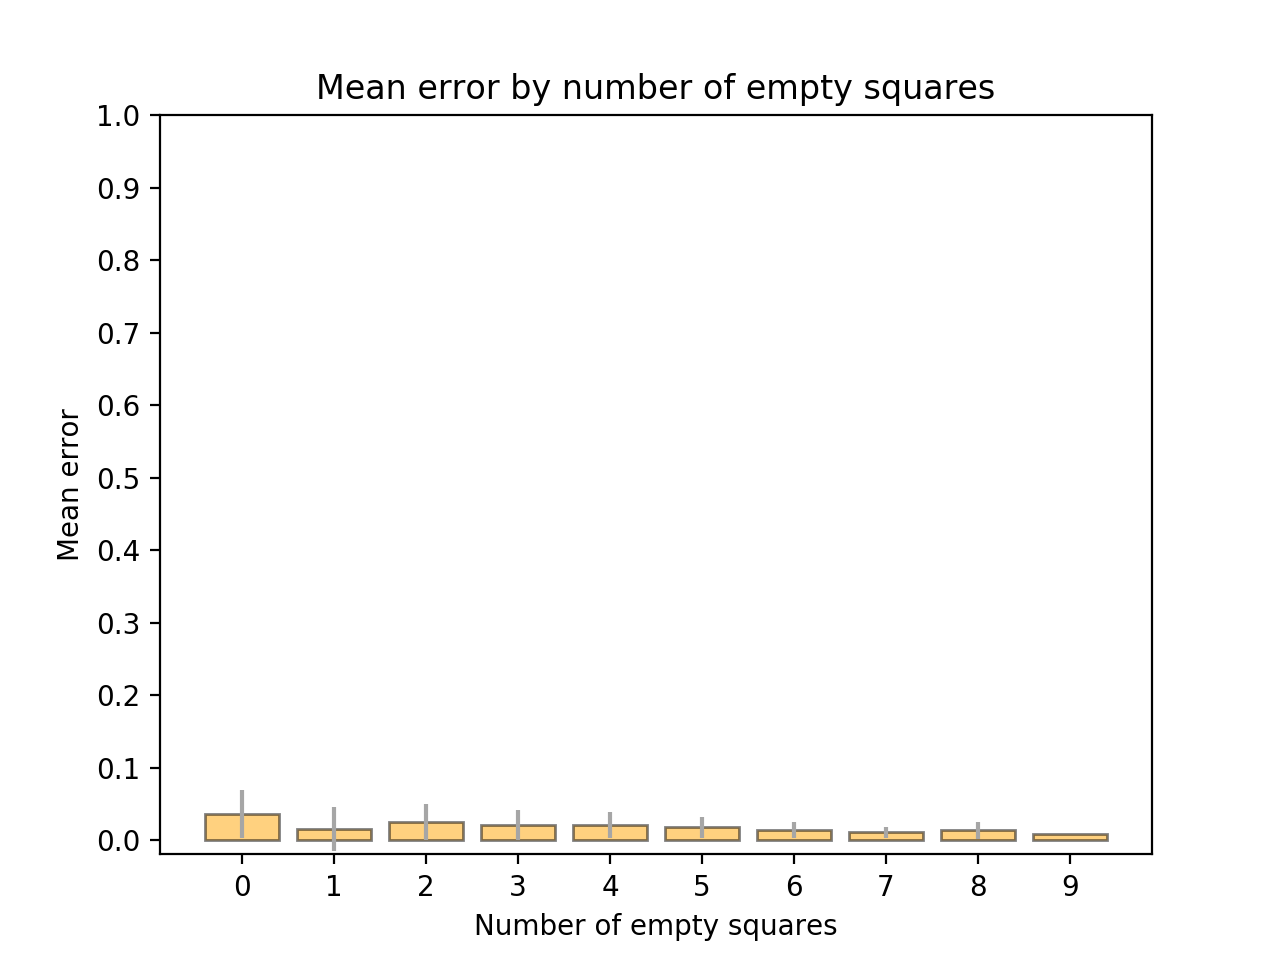

In [6]:
# Mean error.
mean_std = nn.mean_standard_deviation_error_by_num_empty_squares(x, errors[0][0])
mean = [mean for (mean, std) in  mean_std]
std = [std for (mean, std) in  mean_std]

num_empty_squares = np.array(range(ttt.SIZE + 1))

fig = plt.figure()
plt.bar(num_empty_squares, mean, yerr = std, color = color, error_kw = {'ecolor': '0.65'}, edgecolor = edge_color, alpha = opacity)
plt.xticks(range(10))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('Mean error by number of empty squares')
plt.xlabel('Number of empty squares')
plt.ylabel('Mean error')
plt.show()

<IPython.core.display.Javascript object>


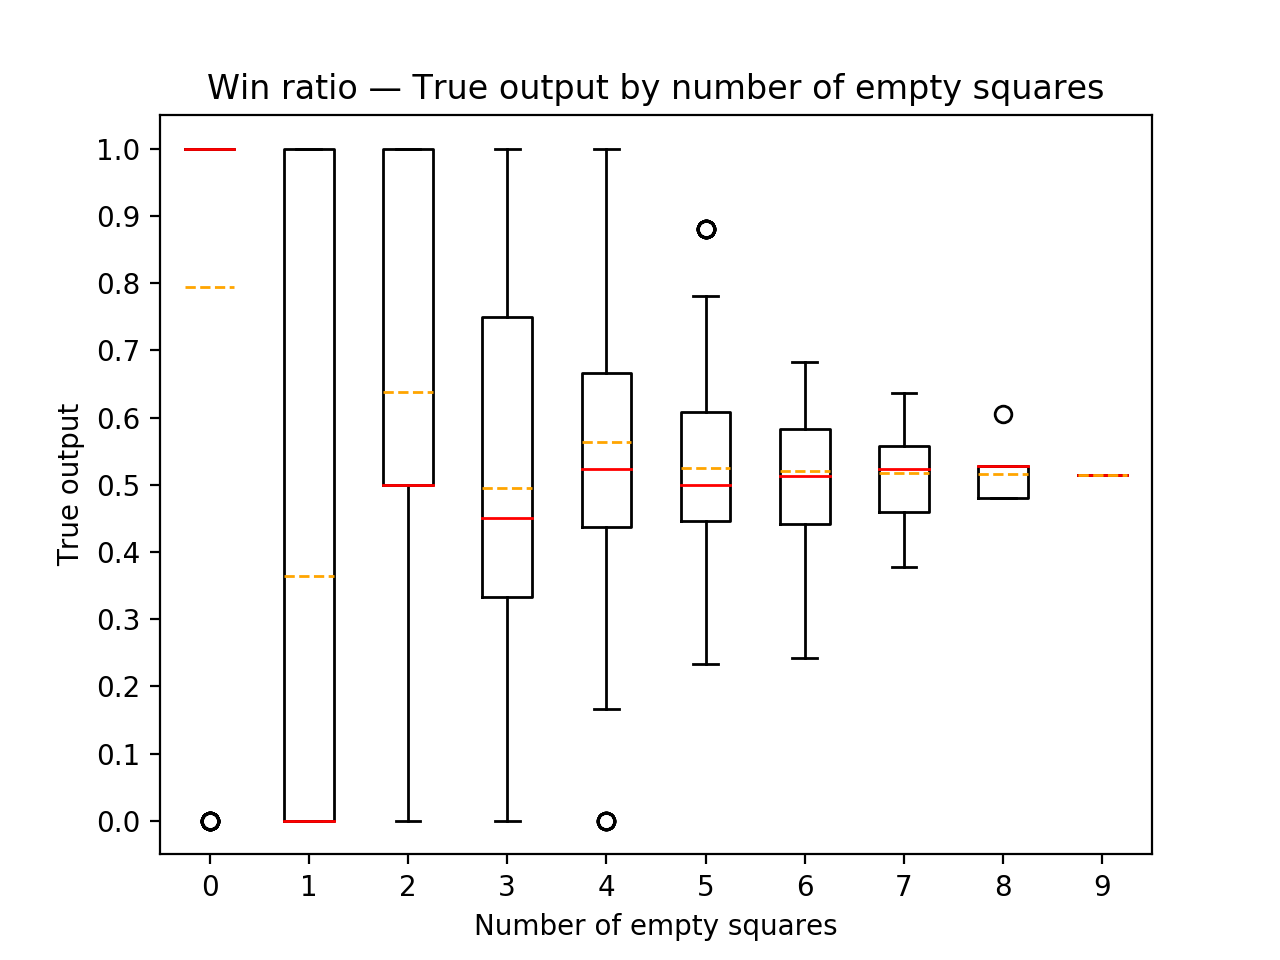

In [7]:
# Boxplot of y_true.
bins = nn.filter_grids_by_empty_squares(x, y_true)
for i, bi in enumerate(bins):
	bins[i] = [y_t for (grid, y_t) in bi]

num_empty_squares = np.array(range(ttt.SIZE + 1))

fig = plt.figure()
bplot = plt.boxplot(bins, showmeans = True, meanline = True)
plt.xticks(range(1, ttt.SIZE + 2), range(ttt.SIZE + 1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
fig.axes[0].set_ylim(-0.05, 1.05)
plt.title('Win ratio — True output by number of empty squares')
plt.xlabel('Number of empty squares')
plt.ylabel('True output')
plt.setp(bplot['means'], color = mean_color)
plt.setp(bplot['medians'], color = median_color)
plt.show()

<IPython.core.display.Javascript object>


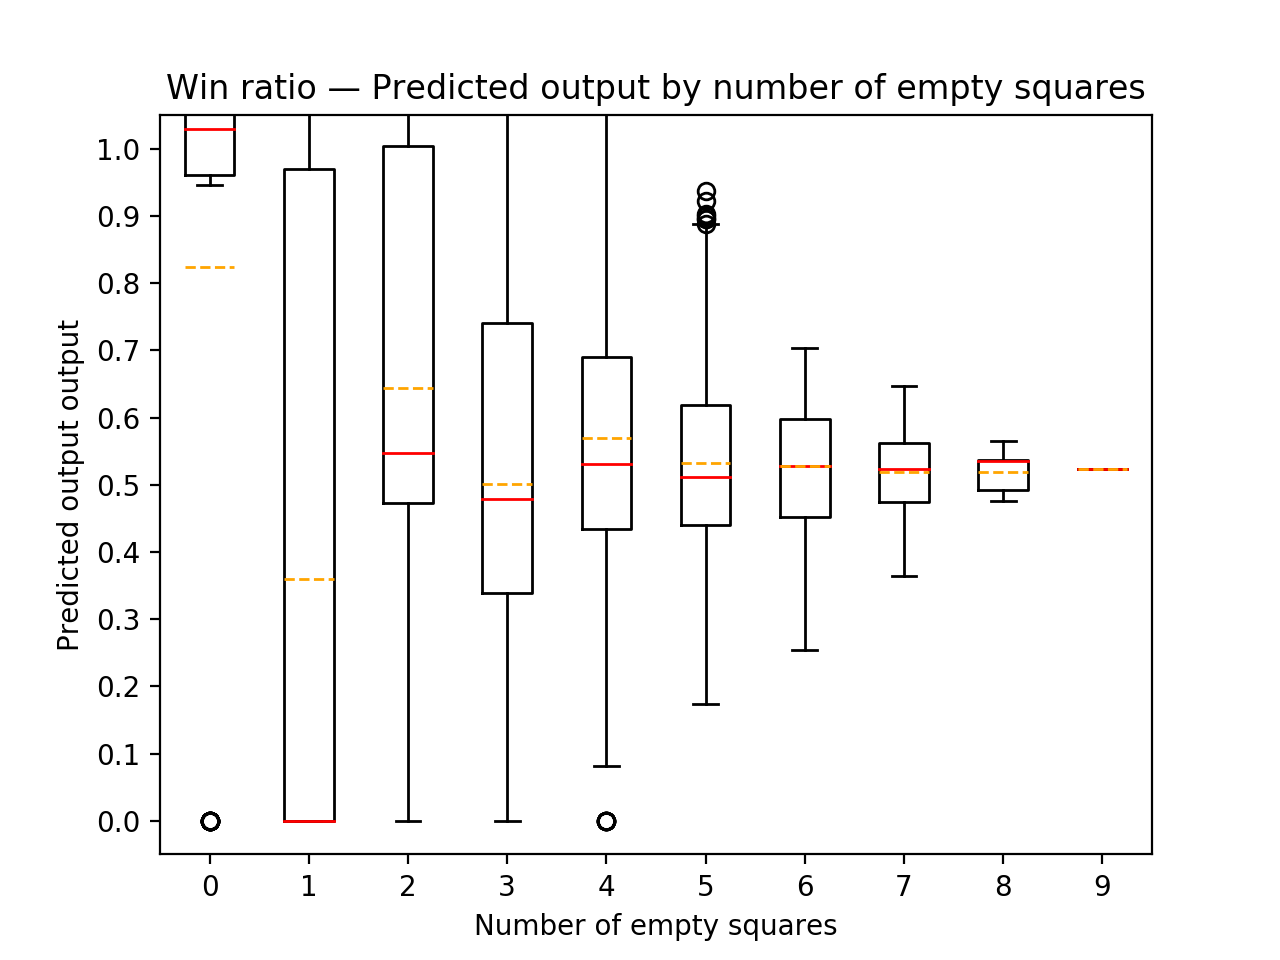

In [8]:
# Boxplot of y_pred.
bins = nn.filter_grids_by_empty_squares(x, y_pred)
for i, bi in enumerate(bins):
	bins[i] = [y_p for (grid, y_p) in bi]

num_empty_squares = np.array(range(ttt.SIZE + 1))

fig = plt.figure()
bplot = plt.boxplot(bins, showmeans = True, meanline = True)
plt.xticks(range(1, ttt.SIZE + 2), range(ttt.SIZE + 1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
fig.axes[0].set_ylim(-0.05, 1.05)
plt.title('Win ratio — Predicted output by number of empty squares')
plt.xlabel('Number of empty squares')
plt.ylabel('Predicted output output')
plt.setp(bplot['means'], color = mean_color)
plt.setp(bplot['medians'], color = median_color)
plt.show()

<IPython.core.display.Javascript object>


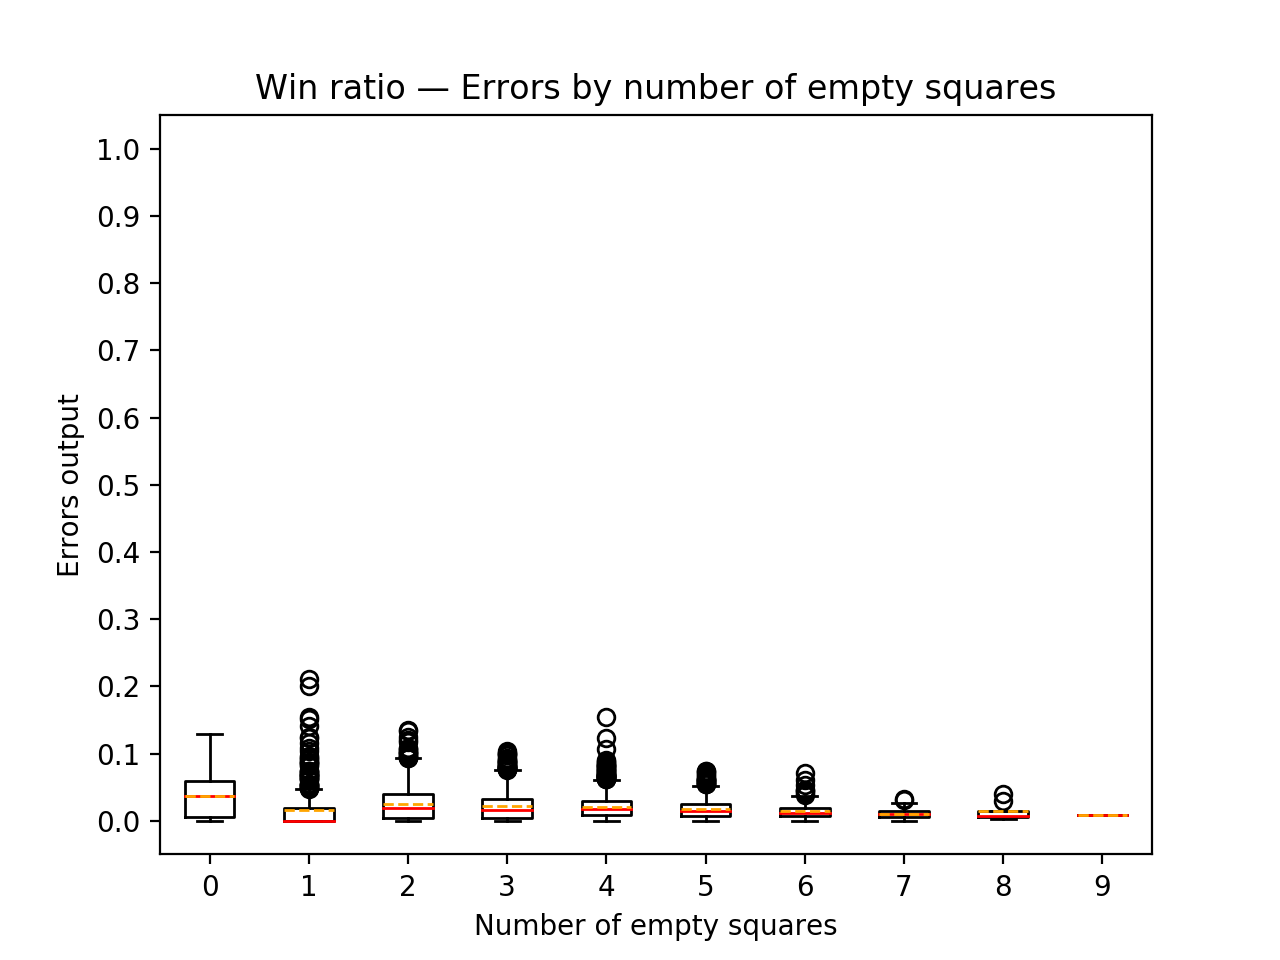

In [9]:
# Boxplot of errors.
bins = nn.filter_grids_by_empty_squares(x, errors[0][0])
for i, bi in enumerate(bins):
	bins[i] = [err for (grid, err) in bi]

num_empty_squares = np.array(range(ttt.SIZE + 1))

fig = plt.figure()
bplot = plt.boxplot(bins, showmeans = True, meanline = True)
plt.xticks(range(1, ttt.SIZE + 2), range(ttt.SIZE + 1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
fig.axes[0].set_ylim(-0.05, 1.05)
plt.title('Win ratio — Errors by number of empty squares')
plt.xlabel('Number of empty squares')
plt.ylabel('Errors output')
plt.setp(bplot['means'], color = mean_color)
plt.setp(bplot['medians'], color = median_color)
plt.show()